In [16]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
  

tesla = yf.Ticker("TSLS")

tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace= True)
t = tesla_data.head()
print(t)

                       Date       Open       High        Low      Close  \
0 2022-08-10 00:00:00-04:00  22.023702  22.855291  22.023702  22.041586   
1 2022-08-11 00:00:00-04:00  21.818037  22.604918  21.818037  22.594187   
2 2022-08-12 00:00:00-04:00  22.399257  22.658570  21.531901  21.543526   
3 2022-08-15 00:00:00-04:00  21.415658  21.415658  20.619834  20.843380   
4 2022-08-16 00:00:00-04:00  20.824602  21.290470  20.548299  20.986448   

   Volume  Dividends  Stock Splits  Capital Gains  
0   14200        0.0           0.0            0.0  
1   21100        0.0           0.0            0.0  
2   34100        0.0           0.0            0.0  
3   74200        0.0           0.0            0.0  
4   52800        0.0           0.0            0.0  


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage using requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Step 2: Save the text of the response as a variable named `html_data`
html_data = response.content

# Step 3: Parse the HTML data using BeautifulSoup with "html.parser" as the parser
soup = BeautifulSoup(html_data, "html.parser")

# Step 4: Find the relevant table with "Tesla Quarterly Revenue"
tables = soup.find_all('table')
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        relevant_table = table
        break

# Step 5: Initialize an empty list to store the extracted rows
data = []

# Step 6: Loop through the table rows and extract Date and Revenue
for row in relevant_table.find_all('tr')[1:]:
    columns = row.find_all('td')
    
    if len(columns) >= 2:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip().replace("$", "").replace(",", "")
        
        # Add extracted data to the list as a dictionary
        data.append({"Date": date, "Revenue": revenue})

# Step 7: Create the DataFrame using pd.DataFrame() instead of using .append()
tesla_revenue = pd.DataFrame(data)

# Step 8: Clean the Revenue data
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Step 9: Display the last 5 rows of the tesla_revenue DataFrame
print("Last 5 rows of the cleaned Tesla Revenue DataFrame:")
print(tesla_revenue.tail())


<>:40: SyntaxWarning: invalid escape sequence '\$'
<>:40: SyntaxWarning: invalid escape sequence '\$'
C:\Users\dell\AppData\Local\Temp\ipykernel_5596\3967404959.py:40: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)


Last 5 rows of the cleaned Tesla Revenue DataFrame:
          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
tesla = yf.Ticker("GME")

gme_data = tesla.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())



                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage using requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

# Step 2: Save the content of the response as a variable named `html_data_2`
html_data_2 = response.content

# Step 3: Parse the HTML data using BeautifulSoup with the `html.parser` parser
soup = BeautifulSoup(html_data_2, "html.parser")

# Step 4: Locate the table with "GameStop Quarterly Revenue"
tables = soup.find_all('table')
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_table = table
        break

# Step 5: Initialize an empty list to store extracted rows
gme_data = []

# Step 6: Extract Date and Revenue from each row in the table
for row in gme_table.find_all('tr')[1:]:
    columns = row.find_all('td')
    
    if len(columns) >= 2:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip()
        gme_data.append({"Date": date, "Revenue": revenue})

# Step 7: Create a DataFrame and clean the Revenue column
gme_revenue = pd.DataFrame(gme_data)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Step 8: Display the last 5 rows of the `gme_revenue` DataFrame
print("Last 5 rows of the GameStop Revenue DataFrame:")
print(gme_revenue.tail())


<>:36: SyntaxWarning: invalid escape sequence '\$'
<>:36: SyntaxWarning: invalid escape sequence '\$'
C:\Users\dell\AppData\Local\Temp\ipykernel_5596\3963556965.py:36: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', "", regex=True)


Last 5 rows of the GameStop Revenue DataFrame:
          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


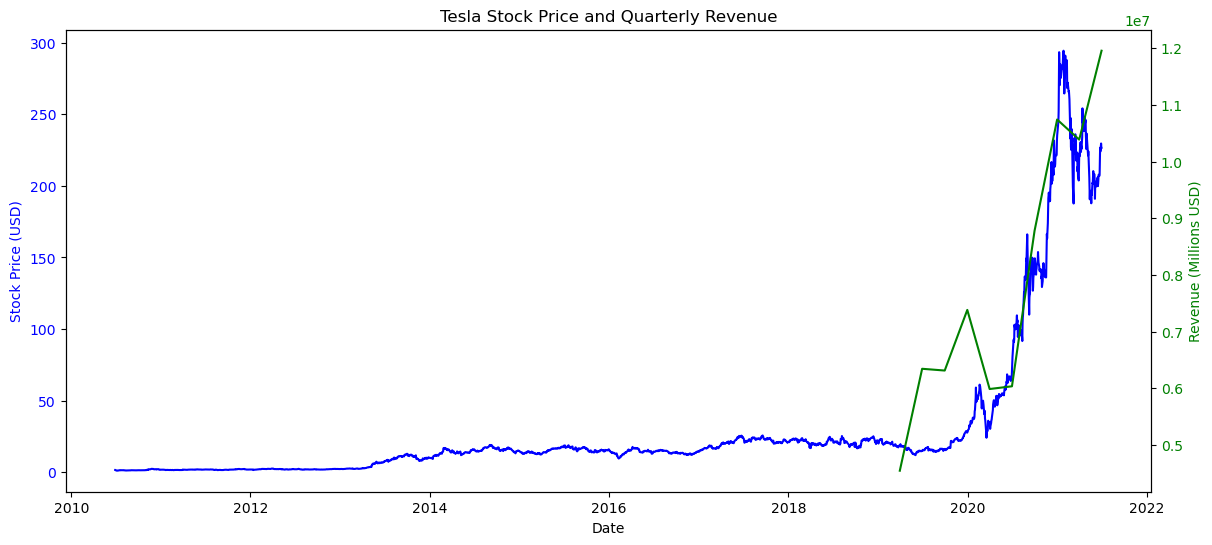

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the `make_graph` function to plot stock price and revenue
def make_graph(stock_data, revenue_data, company_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot Stock Price data on the left y-axis
    ax1.plot(stock_data.index, stock_data['Close'], color='blue', label=f'{company_name} Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create another y-axis for the revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='green', label=f'{company_name} Revenue')
    ax2.set_ylabel('Revenue (Millions USD)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Set the title of the graph
    plt.title(f'{company_name} Stock Price and Quarterly Revenue')
    plt.show()

# Load Tesla stock data using yfinance
tesla_data = yf.Ticker("TSLA").history(period="max")

# Filter data up to June 2021
tesla_data = tesla_data[tesla_data.index <= "2021-06-30"]

# Create Tesla Revenue DataFrame (assuming revenue data is already scraped)
tesla_revenue = pd.DataFrame({
    'Date': pd.to_datetime([
        '2021-06-30', '2021-03-31', '2020-12-31', '2020-09-30', '2020-06-30',
        '2020-03-31', '2019-12-31', '2019-09-30', '2019-06-30', '2019-03-31'
    ]),
    'Revenue': [
        '11958000', '10389000', '10744000', '8779000', '6036000',
        '5988000', '7384000', '6314000', '6345000', '4546000'
    ]
})

# Clean the revenue data by removing commas and converting to float
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').astype(float)

# Plot Tesla Stock and Revenue Data using `make_graph`
make_graph(tesla_data, tesla_revenue, 'Tesla')



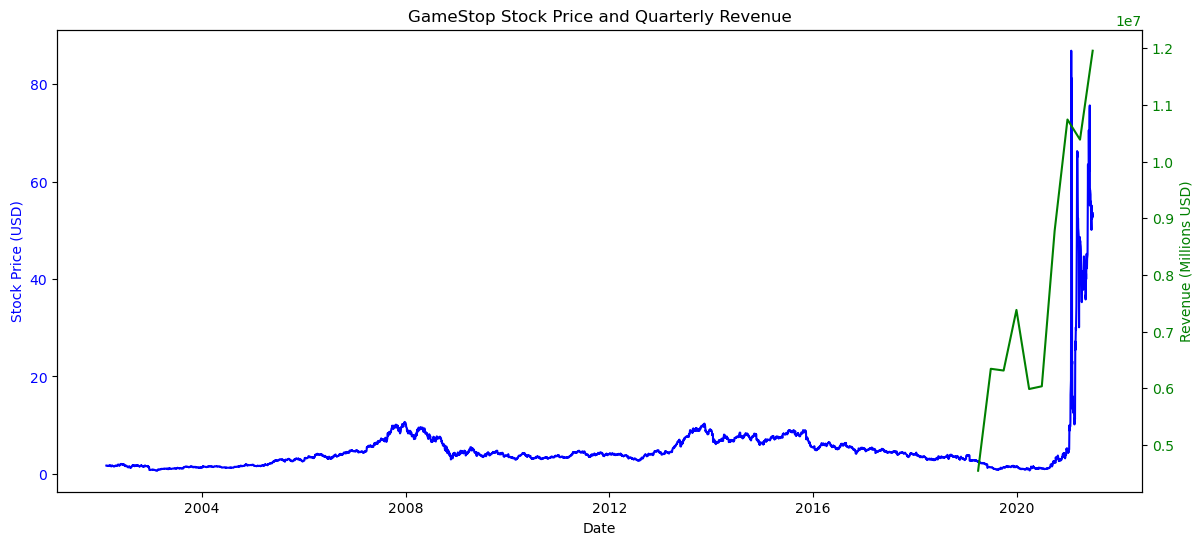

In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the `make_graph` function to plot stock price and revenue
def make_graph(stock_data, revenue_data, company_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot Stock Price data on the left y-axis
    ax1.plot(stock_data.index, stock_data['Close'], color='blue', label=f'{company_name} Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create another y-axis for the revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='green', label=f'{company_name} Revenue')
    ax2.set_ylabel('Revenue (Millions USD)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Set the title of the graph
    plt.title(f'{company_name} Stock Price and Quarterly Revenue')
    plt.show()

# Step 1: Download GameStop stock data using yfinance
gme_data = yf.Ticker("GME").history(period="max")
gme_data = gme_data[gme_data.index <= "2021-06-30"]  # Filter up to June 2021

# Step 2: Create GameStop Revenue DataFrame (if not already available)
gme_revenue = pd.DataFrame({
    'Date': pd.to_datetime([
        '2021-06-30', '2021-03-31', '2020-12-31', '2020-09-30', '2020-06-30',
        '2020-03-31', '2019-12-31', '2019-09-30', '2019-06-30', '2019-03-31'
    ]),
    'Revenue': [
        '11958000', '10389000', '10744000', '8779000', '6036000',
        '5988000', '7384000', '6314000', '6345000', '4546000'
    ]
})

# Step 3: Clean the Revenue data by removing commas and converting to float
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').astype(float)

# Step 4: Plot the GameStop Stock and Revenue graph using `make_graph`
make_graph(gme_data, gme_revenue, 'GameStop')
